# Clustering Algorithms - Hierarchical Demo

Now that you have been introduced to clustering algorithms, we will demonstrate how it is done in Python.

## Introduction
### Hierarchical clustering methods
Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. The later method is known as agglomerative clustering is a _"bottom up"_ approach. 

#### Agglomerative method details
In this lab you will work with agglomerative clustering which roughly works as follows:
1. The distances or _linkages_ between each of the data points is computed.
2. Points are clustered pairwise with their nearest neighbor.
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster.

#### Distance calculations
The distance or linkage function can be computed in a number of ways:
1. Ward linkage measures the increase in variance for the clusters being linked,
2. Average linkage uses the mean pairwise distance between the members of the two clusters,
3. Complete or Maximal linkage uses the maximum distance between the members of the two clusters.

#### Distance metrics
Several different distance metrics are used to compute linkage functions:
1. Euclidian or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
2. Manhattan or l1 distance is robust to outliers and has other interesting properties.
3. Cosine similarity, is the dot product between the location vectors divided by the magnitudes of the vectors.

Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

### Demonstration
We will attempt to do hierarchical clustering on the household dataset based on the size of the households, their environment, their water sources, and their health status.

#### Step 1: Load the dataset
To save us time in recoding the different datasets, we can use the recoded SPSS files provided by DHS. To read the data, we need to use a **pyreadstat** python package instead of pandas. 

The code for loading the data and its dictionaries are prepared below.

In [1]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt

df, meta = pyreadstat.read_sav('data/PHHR71FL.SAV')
df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH233X$1,SH233X$2,SH233X$3,SH233X$4,SH233X$5,SH233Z$1,SH233Z$2,SH233Z$3,SH233Z$4,SH233Z$5
0,00010001,PH7,1.0,1.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010002,PH7,1.0,2.0,4.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00010004,PH7,1.0,4.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00010007,PH7,1.0,7.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00010008,PH7,1.0,8.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
meta.column_names_to_labels

{'HHID': 'Case Identification',
 'HV000': 'Country code and phase',
 'HV001': 'Cluster number',
 'HV002': 'Household number',
 'HV003': "Respondent's line number (answering Household questionnaire)",
 'HV004': 'Ultimate area unit',
 'HV005': 'Household sample weight (6 decimals)',
 'HV006': 'Month of interview',
 'HV007': 'Year of interview',
 'HV008': 'Date of interview (CMC)',
 'HV008A': 'Date of interview Century Day Code (CDC)',
 'HV009': 'Number of household members',
 'HV010': 'Number of eligible women in household',
 'HV011': 'NA - Number of eligible men in household',
 'HV012': 'Number of de jure members',
 'HV013': 'Number of de facto members',
 'HV014': 'Number of children 5 and under (de jure)',
 'HV015': 'Result of household interview',
 'HV016': 'Day of interview',
 'HV017': 'Number of visits',
 'HV018': 'Interviewer identification',
 'HV019': 'NA - Keyer identification',
 'HV020': 'Ever-married sample',
 'HV021': 'Primary sampling unit',
 'HV022': 'Sample strata for sampl

In [3]:
meta.variable_value_labels

{'HV003': {0.0: 'Incomplete household'},
 'HV015': {1.0: 'Completed',
  2.0: 'No Household member/no competent member at home',
  3.0: 'Entire Household absent for extended period of time',
  4.0: 'Postponed',
  5.0: 'Refused',
  6.0: 'Dwelling vacant or address not a dwelling',
  7.0: 'Dwelling destroyed',
  8.0: 'Dwelling not found',
  9.0: 'Other'},
 'HV020': {0.0: 'All woman sample', 1.0: 'Ever married sample'},
 'HV022': {1.0: 'BASILAN',
  2.0: 'CITY OF ISABELA',
  3.0: 'LANAO DEL SUR',
  4.0: 'MAGUINDANAO',
  5.0: 'COTABATO CITY',
  6.0: 'SULU',
  7.0: 'TAWI-TAWI',
  8.0: 'ABRA',
  9.0: 'APAYAO',
  10.0: 'BAGUIO CITY',
  11.0: 'BENGUET (Excluding Baguio City)',
  12.0: 'IFUGAO',
  13.0: 'KALINGA',
  14.0: 'MOUNTAIN PROVINCE',
  15.0: 'BUTUAN CITY (Capital)',
  16.0: 'AGUSAN DEL NORTE (Excluding Butuan City)',
  17.0: 'AGUSAN DEL SUR',
  18.0: 'DINAGAT ISLANDS',
  19.0: 'SURIGAO DEL NORTE',
  20.0: 'SURIGAO DEL SUR',
  21.0: 'CALOOCAN CITY',
  22.0: 'CITY OF MALABON',
  23.0: 'CIT

Do usual data cleaning.

In [4]:
df.dropna(axis = 1, how = 'all', inplace = True)
df = df.loc[:,~df.columns.str.contains('\$')]

df.shape

(27496, 338)

#### Step 2: Selecting & scaling features for clustering

Since what we have is a data with large dimensions, it will be difficult to use all columns for clustering.

While there are different ways to select features for clustering, they will make more sense when we learn more advanced concepts. For the meantime, let's select our feature based off its relevance to our objective.

_For future reference, here's a material on feature selection for clustering: [link](https://github.com/danilkolikov/fsfc)._

In [5]:
feature_cols = ['HV009','HV014','HV025', 'HV201', 'HV202', 'SH202', 'SH207', 'SH221A']

for col in feature_cols:
    print(f'{col}: {meta.column_names_to_labels[col]}')

HV009: Number of household members
HV014: Number of children 5 and under (de jure)
HV025: Type of place of residence
HV201: Source of drinking water
HV202: Source of non-drinking water
SH202: Number of sick/injured persons
SH207: How many of your HH members visited a health facility for consultation/advise or treatment In the last 30 days
SH221A: Number of persons confined in a hospital/clinic


Hierarchical clustering is computationally expensive. Due to memory concerns and for visualization purposes, let's limit clustering to households within Central Luzon (code 3) and use a sample.

In [6]:
cen_luz = df[df['HV024']==3].set_index('HHID').copy()
cen_luz.shape

(2133, 337)

In [7]:
cen_luz_sample = cen_luz.sample(50)
data = cen_luz_sample[feature_cols]

data.columns = [x+'_' for x in data.columns]

Make sure to replace nulls with zeroes so it can be read by the algorithm.

In [8]:
data = data.fillna(0)

Scaling is a process where data is transformed using a function, i.e., a scaling, to a fixed range/ range with known distribution. Standardization and Normalization are some of the common feature scaling methods.

Let's scale the different features.

In [9]:
from sklearn.preprocessing import Normalizer

X = Normalizer().fit_transform(data.values)

#### Step 3: Apply hierarchical clustering
We will use the `scipy.cluster.hierarchy.linkage` function to perform hierarchical clustering on an array of samples.

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

clusters = linkage(X, 'complete')

#### Step 4: Plot the dendrogram to inspect the clusters

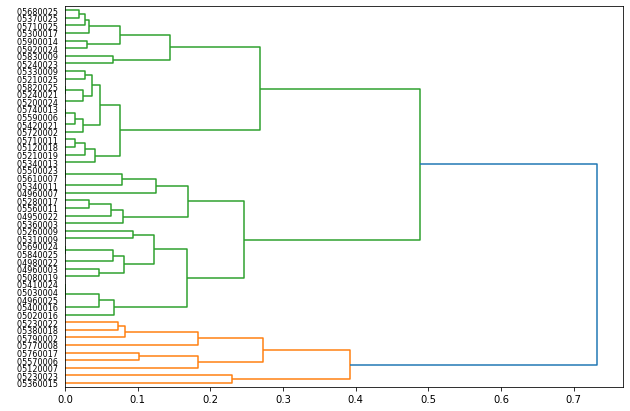

In [11]:
plt.figure(figsize=(10, 7))  
dn = dendrogram(clusters, labels = data.index.tolist(), orientation='right')

#### Step 5: Decide the number of clusters you want & append the labels to your dataframe

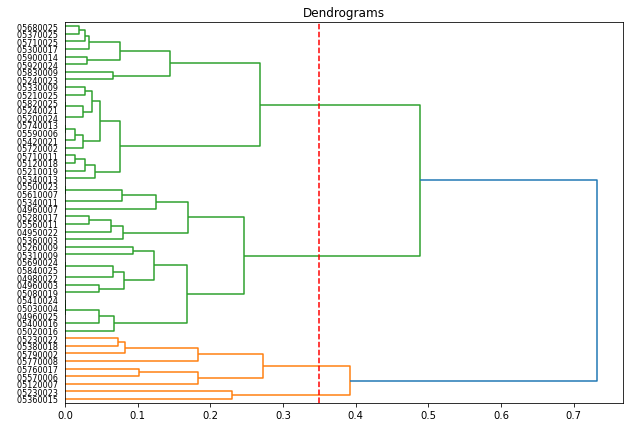

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(clusters, labels = data.index.tolist(), orientation='right')

plt.axvline(x=0.35, color='r', linestyle='--')

In [13]:
cluster_labels = cut_tree(clusters, n_clusters=4).reshape(-1, )

In [14]:
data['cluster_labels'] = cluster_labels

In [15]:
data['cluster_labels'].value_counts()

1    21
0    20
3     7
2     2
Name: cluster_labels, dtype: int64

#### Step 6: Inspect your different clusters

In [16]:
other_cols = [x for x in cen_luz_sample.columns if x not in feature_cols]
data = data.join(cen_luz_sample[other_cols])

data.head()

,HV009_,HV014_,HV025_,HV201_,HV202_,SH202_,SH207_,SH221A_,cluster_labels,HV000,...,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
HHID,,,,,,,,,,,,,,,,,,,,,
05840025,4.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
05240021,4.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
05360015,8.0,2.0,1.0,11.0,0.0,2.0,2.0,0.0,2,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
05370025,2.0,0.0,2.0,71.0,21.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
05770008,5.0,0.0,1.0,11.0,0.0,2.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [17]:
data[data['cluster_labels'] == 0]

,HV009_,HV014_,HV025_,HV201_,HV202_,SH202_,SH207_,SH221A_,cluster_labels,HV000,...,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
HHID,,,,,,,,,,,,,,,,,,,,,
05840025,4.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
05610007,3.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
05560011,5.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0
05400016,1.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
04980022,4.0,1.0,2.0,21.0,0.0,0.0,0.0,1.0,0,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
05030004,2.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
05360003,6.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
04950022,6.0,0.0,2.0,21.0,0.0,1.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
05410024,2.0,0.0,2.0,21.0,0.0,0.0,0.0,0.0,0,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [18]:
data[data['cluster_labels'] == 1]

,HV009_,HV014_,HV025_,HV201_,HV202_,SH202_,SH207_,SH221A_,cluster_labels,HV000,...,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
HHID,,,,,,,,,,,,,,,,,,,,,
05240021,4.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
05370025,2.0,0.0,2.0,71.0,21.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
05820025,4.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
05120018,1.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
05210025,4.0,1.0,1.0,71.0,11.0,1.0,1.0,1.0,1,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
05240023,2.0,0.0,2.0,71.0,31.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
05420021,6.0,0.0,1.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0
05590006,5.0,0.0,1.0,71.0,11.0,0.0,0.0,0.0,1,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0
05920024,7.0,2.0,2.0,71.0,21.0,0.0,0.0,0.0,1,PH7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


In [19]:
data[data['cluster_labels'] == 2]

,HV009_,HV014_,HV025_,HV201_,HV202_,SH202_,SH207_,SH221A_,cluster_labels,HV000,...,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
HHID,,,,,,,,,,,,,,,,,,,,,
05360015,8.0,2.0,1.0,11.0,0.0,2.0,2.0,0.0,2,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
05230023,5.0,3.0,1.0,11.0,0.0,2.0,2.0,1.0,2,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [20]:
data[data['cluster_labels'] == 3]

,HV009_,HV014_,HV025_,HV201_,HV202_,SH202_,SH207_,SH221A_,cluster_labels,HV000,...,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
HHID,,,,,,,,,,,,,,,,,,,,,
05770008,5.0,0.0,1.0,11.0,0.0,2.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
05790002,5.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
05570006,6.0,1.0,1.0,11.0,0.0,1.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0
05380018,8.0,1.0,2.0,21.0,0.0,0.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
05120007,8.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0
05760017,7.0,1.0,1.0,11.0,0.0,1.0,1.0,0.0,3,PH7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
05230022,5.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,3,PH7,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


------------------------------
# Process Summary

__Step 1__: Import and clean the dataset

__Step 2__: Select the columns you want to use for clustering and do feature scaling using `Normalizer` from `sklearn.preprocessing`.

__Step 3__: Apply hierarchical clustering
We will use the `linkage` function from `scipy.cluster.hierarchy` to perform hierarchical clustering on an array of samples. Try using different linkages and see how it will affect your clustering.

__Step 4__: Plot the dendrogram to inspect the clusters
We will use the `scipy.cluster.hierarchy.dendrogram` function to plot the hierarchical clustering for inspection.

__Note:__ Your plot may not be easily readable from the first try. Here are a few helpful adjustments:
- `plt.figure(figsize(x, y))` - will allow you to resize the plot
- `dendrogram(orientation='top')` - will allow you to flip the plot right-side up
- `dendrogram(leaf_font_size=x)` - will allow you to adjust the font size on the labels

__Step 5__: Decide the number of clusters you want & append the labels to your dataframe. 

__Step 6:__ Inspect which units were assigned to each group after deciding on the number of clusters. Nuance groups by the features used to do the clustering and by all other information available (e.g. demographics, location).